**Nombre completo:** Juan José Montoya Sánchez

**Identificación:** 1004998829

⚠️ Al finalizar descargue su notebook en formato `.ipynb` y envíelo al correo `sebastian.duquem@udea.edu.co` con el asunto `Lab computacional 1 - [número de identificación]`.

# Algoritmo de Deutsch

En este lab computacional entenderemos el funcionamiento de pennylane e implementaremos el algoritmo de Deutsch.

La documentación de pennylane se puede encontrar en [https://docs.pennylane.ai/en/stable/](https://docs.pennylane.ai/en/stable/).

En el problema de Deutsch, se tiene una función (que puede considerarse como un oráculo o caja negra) $f(x)$ que toma un bit de entrada $x$ y devuelve un valor binario $f(x)=\text{ 0 ó 1}$. El objetivo es determinar si la función es constante (0 en todas las entradas o 1 en todas las entradas) o balanceada (devuelve 1 para la mitad de las entradas y 0 para la otra mitad).

El problema es determinar cómo es la función (constante o balanceada) aplicando entradas a la caja negra y observando su salida.

 A modo de ejemplo, considérese la función $f(x)=\mod(x,2)$, es decir, la función que devuelve el resto de dividir la entrada entre dos. Esta función devuelve $1$ si el argumento es impar y $0$ si el argumento es par, por lo que se trata de una función balanceada.

 El objetivo del algoritmo de Deutsch es llegar a esta misma conclusión con el menor número posible de iteraciones, algo que en el caso clásico requeriría la evaluación repetida de la función hasta alcanzar dos resultados diferentes, y por tanto el número de iteraciones dependería del orden en el que se escogieran las variables de entrada.

 Para ser precisos, la entrada está representada por la función $f:\Sigma→\Sigma$ de un bit a un bit, donde $\Sigma = \{0,1\}$. Existen cuatro posibles funciones

 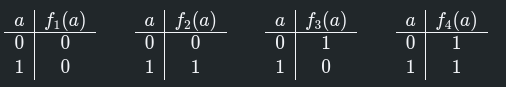

In [19]:
import numpy as np
import pennylane as qml
import matplotlib.pyplot as plt

Considere el siguiente conjunto de matrices unitarias que equivale a un oráculo cuántico, cada uno representando una implementación cuántica de cada una de las funciones anteriormente mencionadas:


In [20]:
Ua = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
])

Ub = np.array([
    [0, 1, 0, 0],
    [1, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, 1, 0]
])

Uc = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

Ud = np.array([
    [0, 1, 0, 0],
    [1, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# 1. Clasificación de las funciones

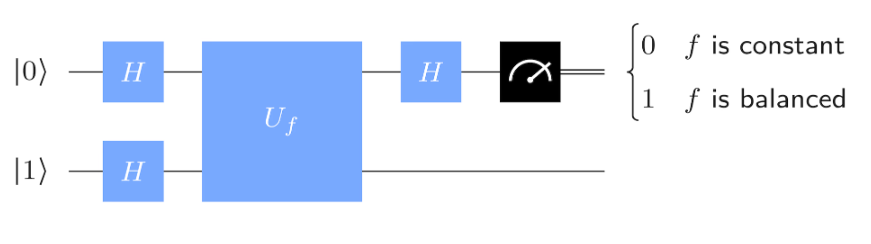

Implemente y utilice el circuito de Deutsch para clasificar cada una de las funciones anteriores en la clase *constante* o *balanceada*.

Para ello puede construir una compuerta cuántica en base a las matrices unitarias antes presentadas usando [`qml.QubitUnitary(U, wires)`](https://docs.pennylane.ai/en/stable/code/api/pennylane.QubitUnitary.html) y utilizar esta compuerta en el circuito de Deutsch.

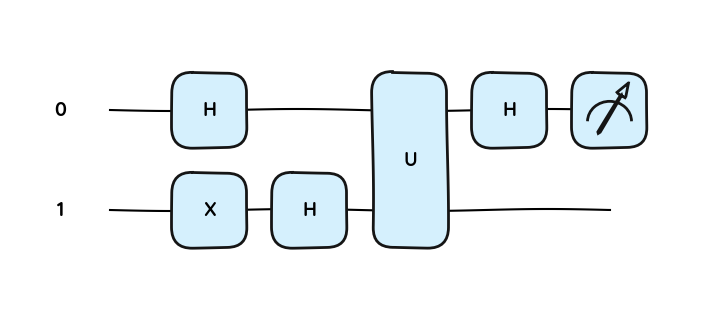

In [21]:
dev = qml.device("default.qubit", wires=2, shots = 1000)

# Usando el decorador
@qml.qnode(dev)
def circuito_deutsch(U):
    qml.Hadamard(wires=0)
    qml.X(wires=1)
    qml.Hadamard(wires=1)
    qml.QubitUnitary(U, wires=[0, 1])
    qml.Hadamard(wires=0)
    # retornarmos la medida en la base computacional
    return qml.probs(wires=0)


# pintamos el circuito
fig, ax = qml.draw_mpl(circuito_deutsch, style="pennylane_sketch")(Ua)
plt.show()


# 2. Identificación de las funciones

Utilizando el estado cuántico en la base computacional (en vez de una medida) al final del circuito, identifique cada uno de los oráculos con la función binaria correspondiente.

In [ ]:
# Circuito con las U's, mirando el segundo elmento de la salida que representa la probabilidad de medir el estado |1>
res_a = int(circuito_deutsch(Ua)[1])
res_b = int(circuito_deutsch(Ub)[1])
res_c = int(circuito_deutsch(Uc)[1])
res_d = int(circuito_deutsch(Ud)[1])

# Clasificar en función de si es 1 o 0
tipo_a = "balanceada" if res_a == 1 else "constante"
tipo_b = "balanceada" if res_b == 1 else "constante"
tipo_c = "balanceada" if res_c == 1 else "constante"
tipo_d = "balanceada" if res_d == 1 else "constante"

# Imprimir los resultados
print("""
Resultados de la función Deutsch con diferentes matrices U:
Resultados para Ua: {} es {},
Resultados para Ub: {} es {},
Resultados para Uc: {} es {},
Resultados para Ud: {} es {} """.format(res_a, tipo_a, res_b, tipo_b, res_c, tipo_c, res_d, tipo_d))


Resultados de la función Deutsch con diferentes matrices U:
Resultados para Ua: 1 es balanceada,
Resultados para Ub: 0 es constante,
Resultados para Uc: 0 es constante,
Resultados para Ud: 1 es balanceada 


## Tarea, identificar usando la funcion de onda y no el estado

En la celda de condigo anterior miramos el resultado directamente desde el estado lo cual no es realista, ahora vamos considerar la probabilidade la funcion de onda, la probabilidad de obtener el estado $\ket{0}$ es: $$P_{0} = |\bra{0}\ket{\psi}|^{2}$$
y la probabilidad de obtener el estado $\ket{1}$ es: $$P_{1} = |\bra{1}\ket{\psi}|^{2}$$


Probabilidades de medir el estado |0> y |1> para cada U:
Resultados para Ua: P(0) = 0.0, P(1) = 1.0, es balanceada,
Resultados para Ub: P(0) = 1.0, P(1) = 0.0, es constante,
Resultados para Uc: P(0) = 1.0, P(1) = 0.0, es constante,
Resultados para Ud: P(0) = 0.0, P(1) = 1.0, es balanceada


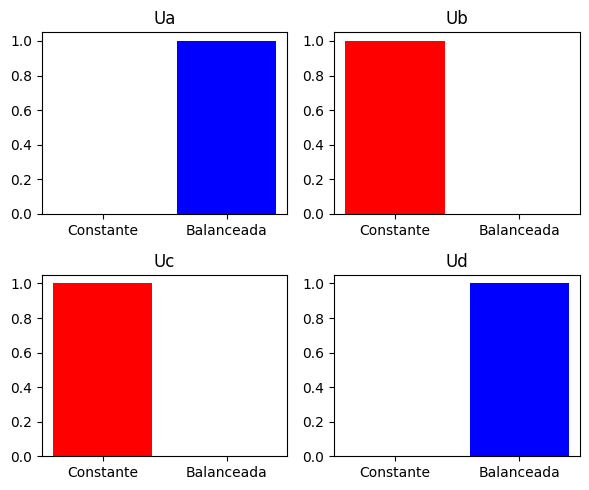

In [66]:
def probabilidades(bra, a):
    """ 
    Definimos una funcion que recibe 0 o 1 para indicar el bra y un vector al que le medimos la probabilidad
    """
    if bra == 0:
        bra = np.array([1, 0])
    elif bra == 1:
        bra = np.array([0, 1])
    else:
        print("bra debe ser 0 o 1")
    return np.abs(bra @ a)**2 # probabilidad

# Ahora volvemos a determinar si las funciones son balanceadas o constantes, pero ahora usando la probabilidad
res_a = circuito_deutsch(Ua)
res_b = circuito_deutsch(Ub)
res_c = circuito_deutsch(Uc)
res_d = circuito_deutsch(Ud)

print("""
Probabilidades de medir el estado |0> y |1> para cada U:
Resultados para Ua: P(0) = {}, P(1) = {}, es {},
Resultados para Ub: P(0) = {}, P(1) = {}, es {},
Resultados para Uc: P(0) = {}, P(1) = {}, es {},
Resultados para Ud: P(0) = {}, P(1) = {}, es {}""".format(
    probabilidades(0, res_a), probabilidades(1, res_a), tipo_a,
    probabilidades(0, res_b), probabilidades(1, res_b), tipo_b,
    probabilidades(0, res_c), probabilidades(1, res_c), tipo_c,
    probabilidades(0, res_d), probabilidades(1, res_d), tipo_d))

# Graficamos
fig, ax = plt.subplots(2, 2, figsize=(6, 5))
ax[0, 0].bar(['Constante', 'Balanceada'], [probabilidades(0, res_a), probabilidades(1, res_a)], color='blue')
ax[0, 0].set_title('Ua')
ax[0, 1].bar(['Constante', 'Balanceada'], [probabilidades(0, res_b), probabilidades(1, res_b)], color='red')
ax[0, 1].set_title('Ub')
ax[1, 0].bar(['Constante', 'Balanceada'], [probabilidades(0, res_c), probabilidades(1, res_c)], color='red')
ax[1, 0].set_title('Uc')
ax[1, 1].bar(['Constante', 'Balanceada'], [probabilidades(0, res_d), probabilidades(1, res_d)], color='blue')
ax[1, 1].set_title('Ud')
plt.tight_layout()
plt.show()

